In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join, isdir, isfile
from os import listdir

In [2]:
datapath = '/home/ambra/Desktop/CTA/projects/DATA/outputs/crab/timing'
pngpath = join(datapath, 'png')
if not isdir(pngpath):
    print('Creating png folder...')
    os.mkdir(pngpath)


In [3]:
tables = [f for f in listdir(datapath) if isfile(join(datapath, f))]
print(f'Tables: {len(tables)}\n')

Tables: 12



In [4]:
for i, table in enumerate(tables):
    print(f'Collecting data from {table}')
    data = pd.read_csv(join(datapath, table), sep=' ')
    data['tools'] = [table.replace('.csv', '') for n in range(len(data))]
    #print(f'5 rows {data[:5]}')
    if i == 0:
        print('start')
        total = data
    else:
        print('add')
        total = total.append(data, sort=False)
    print(f'data: {len(data)} and keys {len(data.keys())}')
    print(f'total: {len(total)} and keys {len(total.keys())}')

start
data: 30 and keys 12
total: 30 and keys 12
add
data: 20 and keys 21
total: 50 and keys 21
add
data: 30 and keys 15
total: 80 and keys 23
add
data: 30 and keys 17
total: 110 and keys 23
add
data: 30 and keys 15
total: 140 and keys 23
add
data: 30 and keys 15
total: 170 and keys 23
add
data: 30 and keys 18
total: 200 and keys 23
add
data: 20 and keys 16
total: 220 and keys 23
add
data: 30 and keys 13
total: 250 and keys 24
add
data: 30 and keys 13
total: 280 and keys 24
add
data: 30 and keys 15
total: 310 and keys 24
add
data: 30 and keys 18
total: 340 and keys 24


In [5]:
tools = total['tools'].drop_duplicates()
print(f'analysis: {len(tools)}')

analysis: 12


In [6]:
#sns.relplot(data=total, x="texp", y="sqrt_ts", col="ttotal", style="flux", size="flux_err", hue="tools")



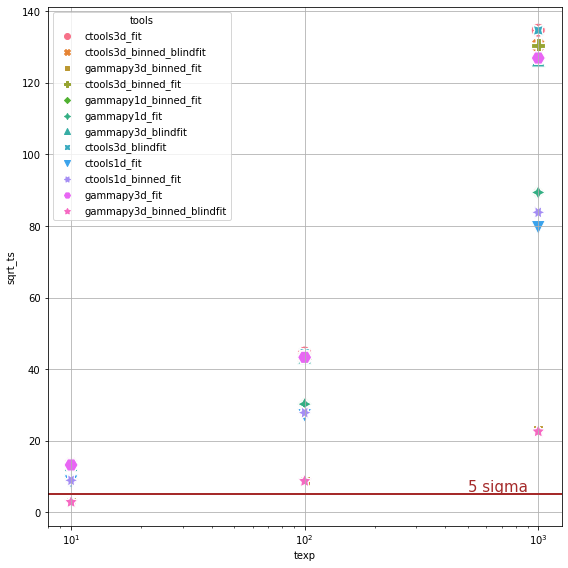

In [7]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set(xscale="log", yscale="linear")
sns.scatterplot(data=total, ax=ax, x="texp", y="sqrt_ts", hue="tools", style="tools", s=200)
plt.axhline(5, ls='-', lw=2, c='brown')
plt.text(500, 6, '5 sigma', size=15, c='brown')
plt.grid()
plt.tight_layout()
plt.savefig(join(pngpath, 'compareCtoolsGammapy_TSvsTEXP.png'))
plt.show()

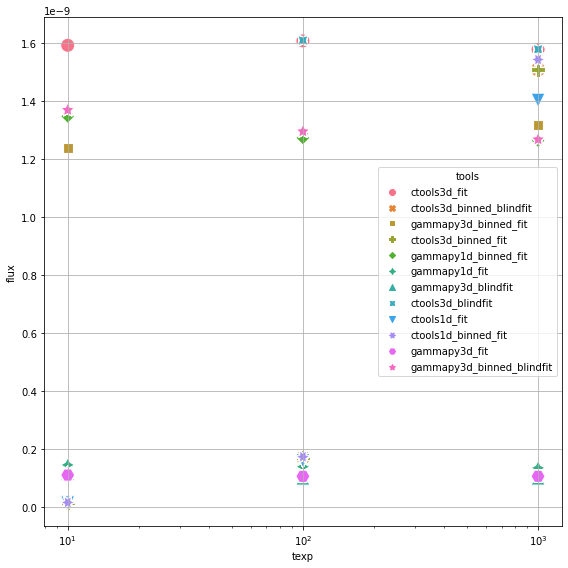

In [8]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set(xscale="log", yscale="linear")
sns.scatterplot(data=total, ax=ax, x="texp", y="flux", hue="tools", style="tools", s=200)
plt.grid()
plt.tight_layout()
plt.savefig(join(pngpath, 'compareCtoolsGammapy_FLUXvsTEXP.png'))
plt.show()

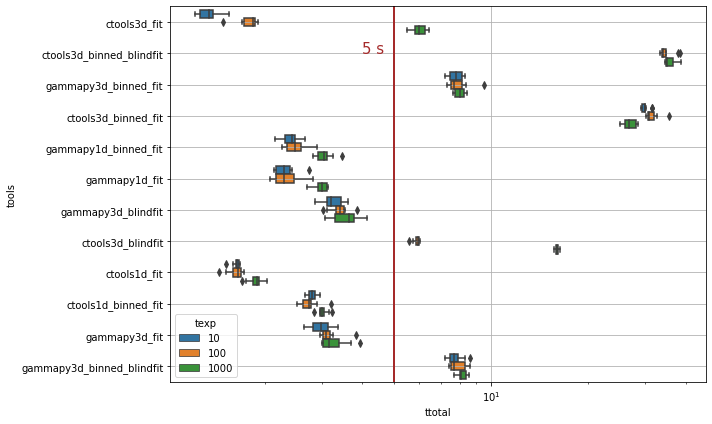

In [17]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=0)
ax.set(xscale="log")
sns.boxplot(data=total, ax=ax, y="tools", x="ttotal", hue='texp')
plt.axvline(5, ls='-', lw=2, c='brown')
plt.text(4, 1, '5 s', size=15, c='brown')
plt.grid()
plt.tight_layout()
plt.savefig(join(pngpath, 'compareCtoolsGammapy_TTOTALvsTEXP.png'))
plt.show()

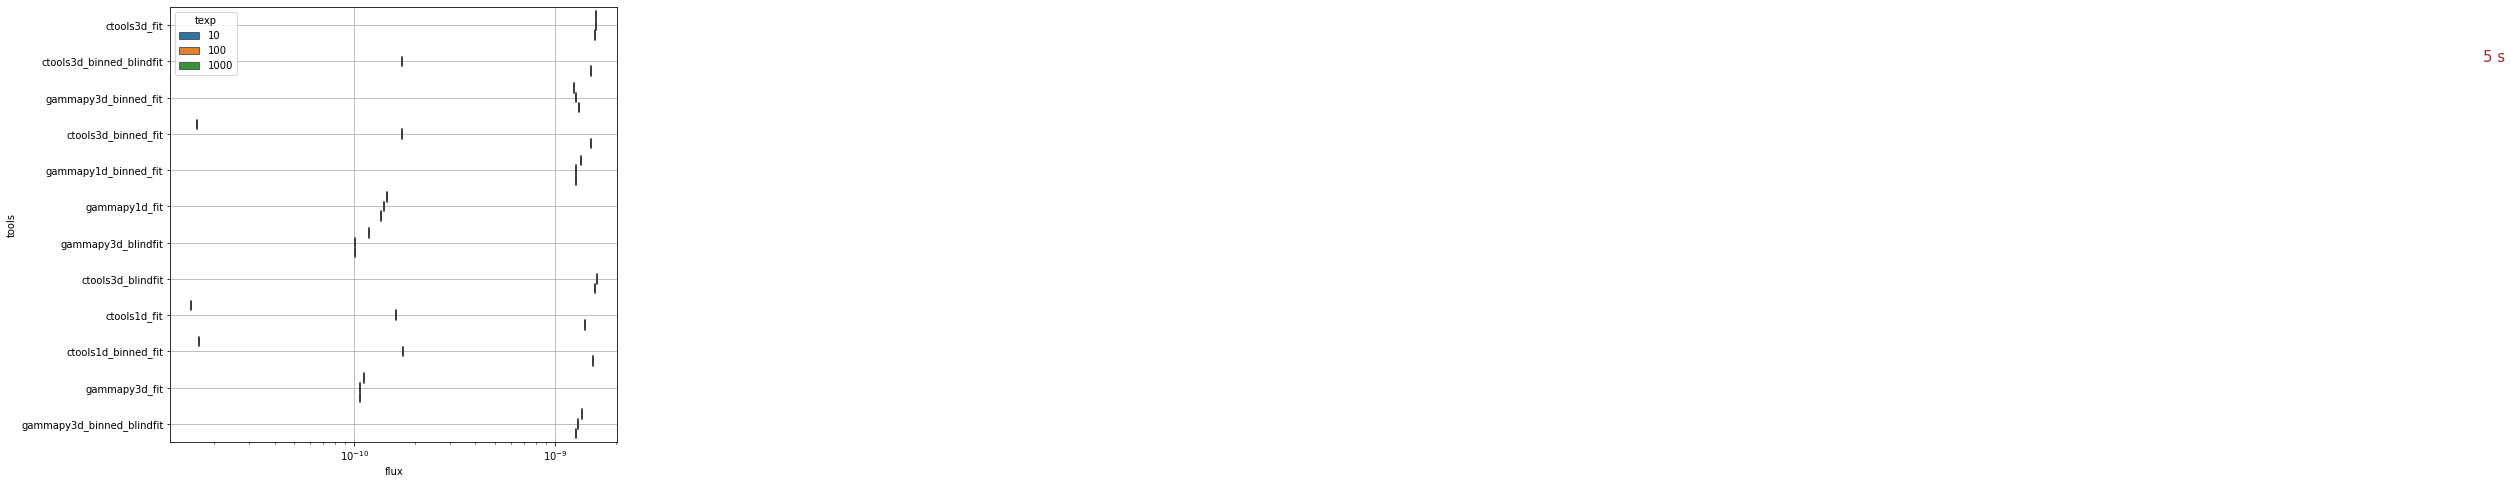